# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1 
<p> For every column in the data:</p>
<ul>
    <li>a. State whether the values match the description given in the table above.</li>
    <li>b. State the number of missing values in the column.</li>
    <li>c. Describe what you did to make values match the description if they did not
    match.</li>
</ul>

### A- Data validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")


In [2]:
fitness_data = pd.read_csv("dataset/fitness_class_2212.csv")
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [3]:
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


* The data match exatly the description*

In [4]:
fitness_data["days_before"] = fitness_data["days_before"].str.strip("days")


In [5]:
fitness_data["days_before"] = fitness_data["days_before"].astype("int64")
fitness_data.describe()

,booking_id,months_as_member,weight,days_before,attended
count,1500.000000,1500.000000,1480.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,8.346667,0.302667
std,433.157015,12.926543,12.765859,4.077938,0.459565
min,1.000000,1.000000,55.410000,1.000000,0.000000
25%,375.750000,8.000000,73.490000,4.000000,0.000000
50%,750.500000,12.000000,80.760000,9.000000,0.000000
75%,1125.250000,19.000000,89.520000,12.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,1.000000


In [6]:
fitness_data.select_dtypes("object")

,day_of_week,time,category
0,Wed,PM,Strength
1,Mon,AM,HIIT
2,Sun,AM,Strength
3,Fri,AM,Cycling
4,Thu,AM,HIIT
...,...,...,...
1495,Fri,AM,HIIT
1496,Mon,AM,Strength
1497,Tue,AM,HIIT
1498,Sun,AM,Aqua


In [7]:
fitness_data.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

* Only the <code>weight</code> column has 20 missing values *

In [8]:
# Replace the missing values of weight column with the overall average weight
fitness_data["weight"].fillna(fitness_data["weight"].mean(), inplace=True)

In [9]:
fitness_data.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [10]:
fitness_data["category"].value_counts()

category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: count, dtype: int64

In [11]:
fitness_data["category"] = fitness_data["category"].astype("category")

In [12]:
new_category = {"-":"unknown"}
fitness_data["category"] = fitness_data["category"].cat.rename_categories(new_categories=new_category)

In [13]:
fitness_data["category"].value_counts()

category
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
unknown      13
Name: count, dtype: int64

In [14]:
fitness_data["day_of_week"].value_counts()

day_of_week
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: count, dtype: int64

In [15]:
fitness_data["day_of_week"] = fitness_data["day_of_week"].astype("category")
categories = ["Wednesday", "Fri.", "Monday"]
fitness_data["day_of_week"] = fitness_data["day_of_week"].cat.remove_categories(categories)

In [16]:
fitness_data["day_of_week"].value_counts()

day_of_week
Fri    279
Thu    241
Mon    218
Sun    213
Sat    202
Tue    195
Wed     81
Name: count, dtype: int64

In [17]:
fitness_data.select_dtypes("object")

,time
0,PM
1,AM
2,AM
3,AM
4,AM
...,...
1495,AM
1496,AM
1497,AM
1498,AM


In [18]:
fitness_data["time"].value_counts()

time
AM    1141
PM     359
Name: count, dtype: int64

In [19]:
fitness_data["time"] = fitness_data["time"].astype("category")

In [20]:
fitness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1429 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   int64   
dtypes: category(3), float64(1), int64(4)
memory usage: 63.8 KB


### Summary
<p> The data is nicely cleaned, only the <code>days_before</code> column has incorrect type to check the statistics along with the other features
such as the min and max. before I converted it to <code>int64</code> type, I deleted the "days" text appeared in some values using <code>column.str.strip()</code> method. Then I verified the min and values for the columns mentioned in the description, secondly but not last, I deleted the duplicated categories present in <code> day_of_week</code> column.</br>
</br>
Finally, I checked the missing values, and based in my observation, only <code>weight</code> column has 20 missing values, replaced with the overall mean weight. </p>

## Task 2
<p>2. Create a visualization that shows how many bookings attended the class. Use the visualization to:</p>
<ul>
<li> a. State which category of the variable attended has the most observations </li>
<li> b. Explain whether the observations are balanced across categories of the variable attended </li>
</ul>

In [21]:
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [22]:
fitness_data["attended"].value_counts()

attended
0    1046
1     454
Name: count, dtype: int64

<Axes: xlabel='attended', ylabel='count'>

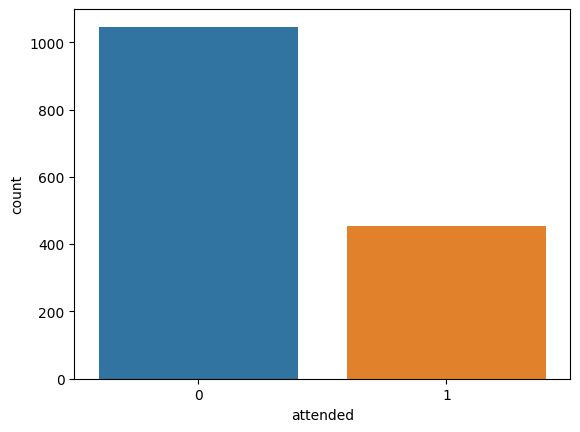

In [23]:
sns.countplot(data=fitness_data, x="attended")

<Axes: xlabel='attended', ylabel='count'>

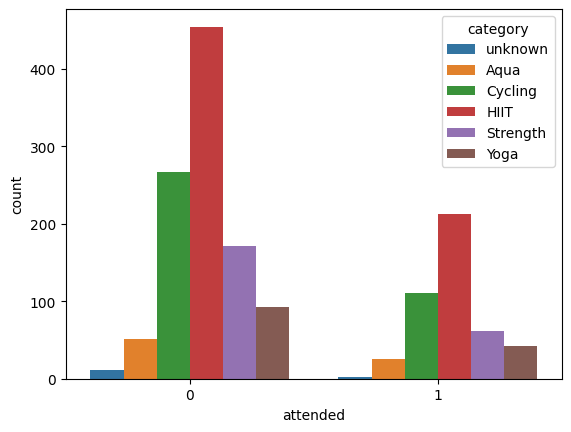

In [24]:
sns.countplot(data=fitness_data, x="attended", hue="category")

### Summary
<p> Based on the observations, more people do not often attend, Where we have 1046 not attended, and only 454 attended.</p>
<p> The visualation above shows the number of observations of variable attended for each gym category, we can clearly observe the unbalance across categories, where we have more non attended people.</p>

## Task 3
The distribution of the number of months as a member.*

In [25]:
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


<Axes: xlabel='months_as_member', ylabel='Count'>

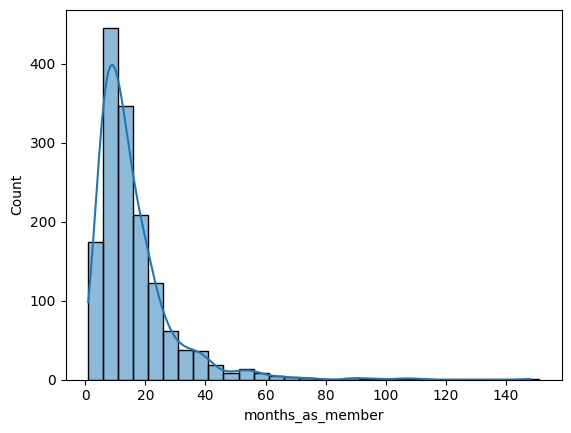

In [26]:
sns.histplot(data=fitness_data, x="months_as_member", binwidth=5, kde=True)

## Summary
From the histogram above, We have a lognormal like distribution,Most observations is between 0 and 60, means the monthly membership is between 0 and 60 month.

## Task 4
*The relationship between attendance and number of months as a member.*

<Axes: xlabel='months_as_member', ylabel='attended'>

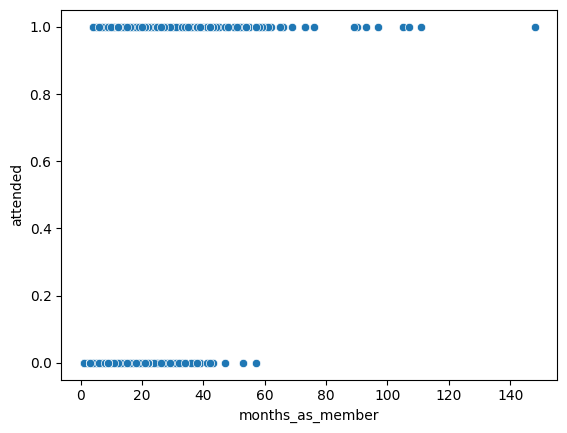

In [27]:
sns.scatterplot(data=fitness_data, x="months_as_member", y="attended")

In [28]:
fitness_data.groupby("day_of_week")["attended"].value_counts()

day_of_week  attended
Fri          0           197
             1            82
Mon          0           156
             1            62
Sat          0           139
             1            63
Sun          0           142
             1            71
Thu          0           163
             1            78
Tue          0           136
             1            59
Wed          0            70
             1            11
Name: count, dtype: int64

In [29]:
fitness_data["attended"].corr(fitness_data["months_as_member"])

0.48552622327526346

In [30]:
from statsmodels.formula.api import ols

model = ols("months_as_member ~ attended", data=fitness_data).fit()
model.params


Intercept    11.495220
attended     13.656762
dtype: float64

In [31]:
fitness_data.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [32]:
test = fitness_data.drop(["booking_id"], axis=1)
test.head()

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,Wed,PM,Strength,0
1,10,79.01,2,Mon,AM,HIIT,0
2,16,74.53,14,Sun,AM,Strength,0
3,5,86.12,10,Fri,AM,Cycling,0
4,15,69.29,8,Thu,AM,HIIT,0


In [33]:
test = pd.get_dummies(test, drop_first=True).astype("int")
test

,months_as_member,weight,days_before,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,17,79,8,0,0,0,0,0,0,1,1,0,0,0,1,0
1,10,79,2,0,1,0,0,0,0,0,0,0,0,1,0,0
2,16,74,14,0,0,0,1,0,0,0,0,0,0,0,1,0
3,5,86,10,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15,69,8,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,21,79,10,0,0,0,0,0,0,0,0,0,0,1,0,0
1496,29,89,2,0,1,0,0,0,0,0,0,0,0,0,1,0
1497,9,87,4,0,0,0,0,0,1,0,0,0,0,1,0,0
1498,34,68,14,0,0,0,1,0,0,0,0,1,0,0,0,0


In [34]:
len(test.columns)

16

### Summary
<strong><p>From the sacatter plot above, and based on the regression model implemented using <code>statsmodels</code>, 
the attendance and monthly member have a positive relationship. </p></strong>

## Task 5
*The business wants to predict whether members will attend using the data provided.<br/>
The type of machine learning problem that this is classification task*

## Task 6
*Let's fit a Decison Tree model for feature importance*

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = test.drop("attended", axis=1).values
y = test["attended"].values

X.shape, y.shape

((1500, 15), (1500,))

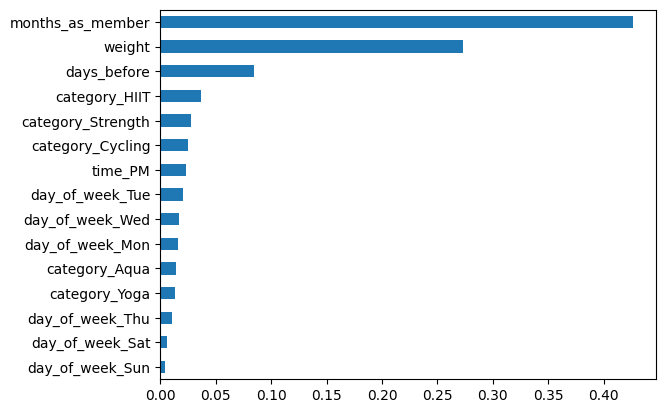

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=34)

dt = DecisionTreeClassifier(criterion="gini")
dt.fit(X_train, y_train)
x = test.drop("attended", axis=1)


importance_f = pd.Series(dt.feature_importances_, index=x.columns)

importance_f = importance_f.sort_values()

importance_f.plot(kind="barh")
plt.show()





In [40]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":[2,3,4,5,6],
    "max_features": [0.16, 0.20, 0.40, 0.6, 0.8],
    "min_samples_leaf":[0.1, 0.12,0.13, 0.16, 0.20,1]
}

gs = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring="accuracy", n_jobs=-1)

gs.fit(X_train, y_train)

gs.best_params_, gs.best_score_

({'max_depth': 4, 'max_features': 0.8, 'min_samples_leaf': 0.1},
 0.7723809523809523)

In [41]:
best_model = gs.best_estimator_
best_model.fit(X_train, y_train)
y_hat = best_model.predict_proba(X_test)[:,1] # probability of positive classe


In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

rscore = roc_auc_score(y_test, y_hat)
fpr, tpr, th = roc_curve(y_test, y_hat)
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(report)

[[240  66]
 [ 38 106]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       306
           1       0.62      0.74      0.67       144

    accuracy                           0.77       450
   macro avg       0.74      0.76      0.75       450
weighted avg       0.78      0.77      0.77       450



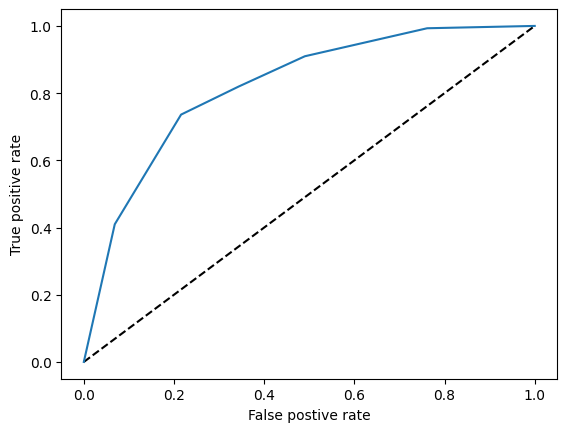

In [43]:
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False postive rate")
plt.ylabel("True positive rate")
plt.show()

## Task 7
*Comparaison model*

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#predict for the positif class : attended
y_proba = logreg.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, y_proba)
roc_score

0.8352736928104575

In [45]:
acc = accuracy_score(y_test, y_pred)
acc

0.7955555555555556

Text(0.5, 1.0, 'Logistic Regression ROC curve')

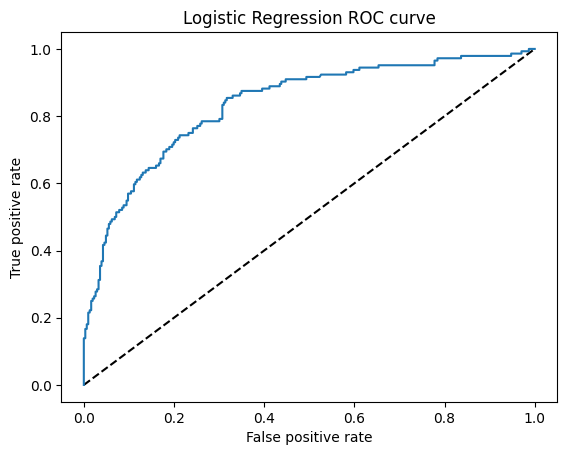

In [46]:
fpr, tpr, threshold = roc_curve(y_test, y_proba)

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression ROC curve")

In [47]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,[0,1]]
X.shape, X_test.shape


((150, 2), (450, 15))

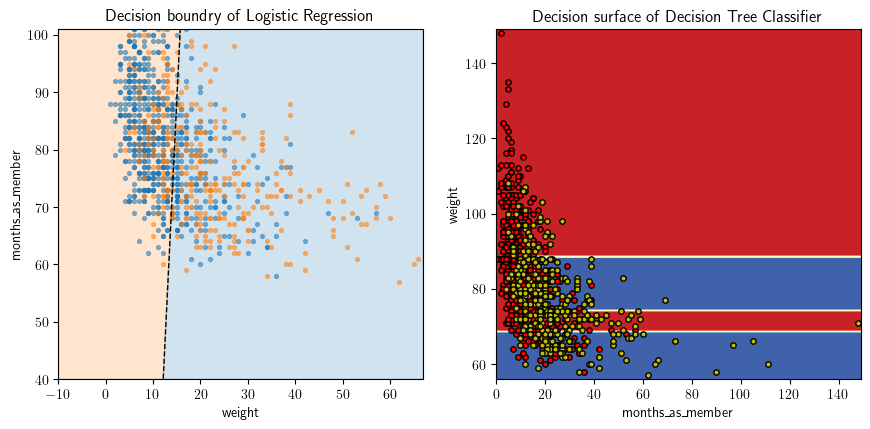

In [89]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(16,10))

plt.rc("text", usetex=True)

ax1 = plt.subplot(2,3, 1)
ax2 = plt.subplot(2,3,2)

b = logreg.intercept_[0]
w1, w2 = logreg.coef_[0,0], logreg.coef_[0,1]
c = -b/w2
m = -w1/w2

xmin, xmax = X_train[1].min()-10, X_train[1].max()-10
ymin, ymax = X_train[0].min()+40, X_train[0].max()+20

xd = np.array([xmin, xmax])
yd = m*xd + c

colors = "ryb"
classes = 2



    

X = X_train[:, :2]


clf = best_model.fit(X, y_train)


DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax2,
        xlabel= "months_as_member",
        ylabel="weight"
    )
for i, color in zip(range(classes), colors):
    idx = np.where(y_train == i)
    plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )



ax1.plot(xd, yd, 'k', lw=1, ls="--")
ax1.fill_between(xd, yd, ymin, color="tab:blue", alpha=0.2)
ax1.fill_between(xd, yd, ymax, color="tab:orange", alpha=0.2)

ax1.scatter(*X_train[:, :2][y_train == 0].T, s=8, alpha=0.5)
ax1.scatter(*X_train[:, :2][y_train == 1].T, s=8, alpha=0.5)


ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.set_ylabel(r'months_as_member')
ax1.set_xlabel(r'weight')

ax1.set_title("Decision boundry of Logistic Regression")
ax2.set_title("Decision surface of Decision Tree Classifier")




plt.show()

## Task 8
*Both models have High accuracy and precision*

## Task 9
*Write your description here*

In [50]:
# Start coding here... 

## Task 10
*Write your description here*

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam